# **AP157 Machine Learning Lab Assignment**
## Module A.3: Dimensionality Reduction -- Principal Component Analysis of SDSS Galaxy Spectra

_Instructions_: Answer each part of the assignment as completely as you can. Discuss **all** your code and results as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points** (Parts 1 and 2 are worth 25 and 75 points, respectively).

_Credits_: This assignment is based on the scikit-learn tutorial "Dimensionality Reduction of Astronomical Spectra" ([link](https://ogrisel.github.io/scikit-learn.org/sklearn-tutorial/tutorial/astronomy/dimensionality_reduction.html))

### Student Information

_Full Name (Last Name, First Name)_: Manuel, Johann Jude\
_Student No._: 2021-08318\
_Section_: TX-2

### Submission Information

_Date and Time Submitted (most recent upload)_: 05/03/24 11:30 PM

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name:** JOHANN JUDE TAN MANUEL

### Grading Information (c/o Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Part 1 - []/25
* Part 2 - []/75

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

For this assignment, you will work with galaxy spectra data from the
Sloan Digital Sky Survey (SDSS). First, you need to make a copy of the file ```spec4000_use.npz``` and save it to a folder in your **own Google Drive**. This file is available from the AP157 Machine Learning Google Drive (under the Datasets folder).

The code cells below will (1) mount your Google Drive and (2) load ```spec4000_corrected.npz``` from your Google Drive folder.

First, mount the Google Drive where you saved the .npy file.

When you run this cell, you will be asked to sign in to your Google account and you will get an authorization code. Paste the code on the provided cell to mount the Google Drive.

In [37]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Run this command to list the directories in your Google Drive and check that the mount was successful.

In [ ]:
!ls drive/My\ Drive

Define the directory path to the location of the file, i.e. if it is in a
folder named "AP157" under My Drive, then the file path will be "/content/drive/My Drive/AP157". Change the string variable in the code cell below, as needed:

In [39]:
file_path = "/content/drive/My Drive/AP157/"

Now, we can load the file using $\tt numpy$'s $\tt load$ function below.


In [40]:
import numpy as np
data = np.load(file_path + 'spec4000_corrected.npz')

The NpzFile object is a dictionary-like object which can be queried for its list of arrays and the arrays themselves ([reference](https://numpy.org/doc/stable/reference/generated/numpy.savez.html)). Our object contains two arrays: ``spec_recons`` - 4000 reconstructed SDSS spectra each with 1000 attributes (flux in units of $10^{-17}$ erg cm$^{-2}$ s$^{-1}$ Å$^{-1}$) and ``wavelength`` - array of wavelengths (in units of Angstroms) corresponding to these attributes.

In [41]:
data.files

['spec_recons', 'wavelength']

In [42]:
np.shape(data['spec_recons']), np.shape(data['wavelength'])

((4000, 1000), (1000,))

Let's plot the first few spectra to visualize our data

In [43]:
from matplotlib import pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Sample SDSS spectra')

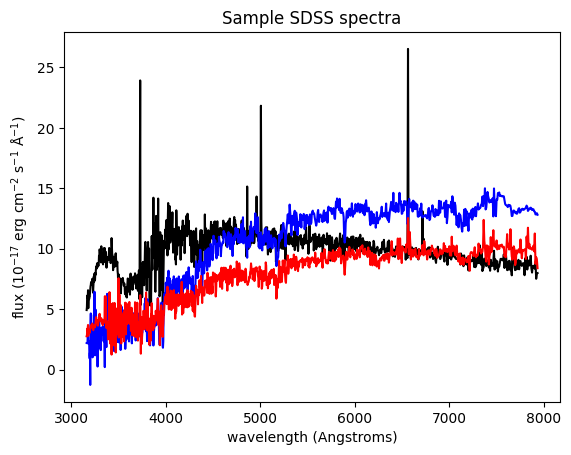

In [44]:
wavelength = data['wavelength']
flux0 = data['spec_recons'][0,:]
flux1 = data['spec_recons'][1,:]
flux2 = data['spec_recons'][2,:]

plt.plot(wavelength, flux0, 'k-')
plt.plot(wavelength, flux1, 'b-')
plt.plot(wavelength, flux2, 'r-')
plt.ylabel("flux ($10^{-17}$ erg cm$^{-2}$ s$^{-1}$ Å$^{-1}$)")
plt.xlabel("wavelength (Angstroms)")
plt.title("Sample SDSS spectra")

#### PART 1 - Get mean normalized spectrum *(25 pts.)*

Plot the mean spectrum by first normalizing the spectra and plot the mean and standard deviation. For this, you may use the ``normalize`` function in scikit-learn's preprocessing module [(documentation)](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.normalize.html). Describe the mean spectrum and note wavelengths with the highest variation across the sample. What is the reason for this variation?


In [45]:
spec_recons = data["spec_recons"]
wavelengths = data["wavelength"]

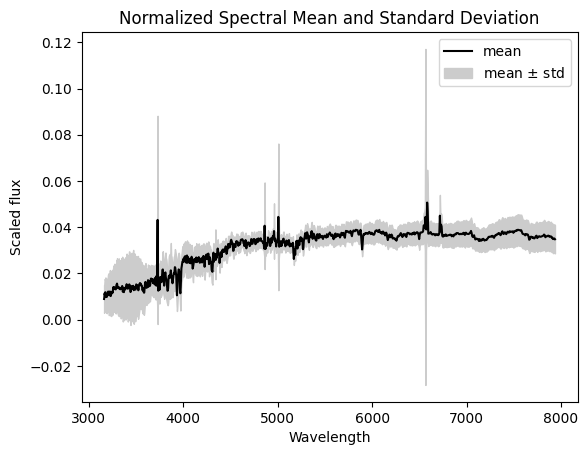

In [46]:
from sklearn import preprocessing

spec_recons = preprocessing.normalize(spec_recons)  # Normalize data

# Get mean and std
mean = spec_recons.mean(0)
std = spec_recons.std(0)

plt.plot(wavelengths, mean, label="mean", color="black")    # Plot wavelength against mean
plt.fill_between(wavelengths, mean - std, mean + std, color='#CCCCCC', label="mean $\pm$ std")    # Plot mean + or - the standard deviation
plt.title("Normalized Spectral Mean and Standard Deviation")
plt.xlabel("Wavelength")
plt.ylabel("Scaled flux")
plt.legend()

From the normalized spectral mean above, we observe that the flux has a tendency to rise slightly with longer wavelength. Still, the flux is mostly contained in a narrow range. In particular, the mean flux seems to range from $0.01$ to around $0.04$. We also observe some spikes in standard deviation at wavelengths of around $3800$, $5000$, and $6600$ Angstroms. This may have something to do with the abundance of certain elements in the galaxy. In particular for the Balmer series, Hydrogen can emit wavelengths of around $656$ nanometers, hence the spike. Other spikes may come from other abundant elements in space.

(Source: https://en.wikipedia.org/wiki/Astronomical_spectroscopy)

#### PART 2 - Get principal components *(75 pts.)*

Perform Principal Component Analysis (PCA) and visualize the top principal components:
1. Get the first 4 principal components using the ``PCA`` function in scikit-learn's decomposition module [(documentation)](https://scikit-learn.org/0.15/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA). Make sure to use the normalized spectra as input. *(25 pts.)*


In [47]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4)
spec_recons_projected = pca.fit_transform(spec_recons)
spec_recons_projected.shape

(4000, 4)

The data shape is originally ((4000, 1000), (1000,)) as shown earlier. Notice how by projecting it along eigenvectors obtained from PCA we can greatly simplify the data to the above shape. We can also observe the explained variance of these eigenvectors below.

array([0.4415291 , 0.24275094, 0.1023632 , 0.0690146 ], dtype=float32)

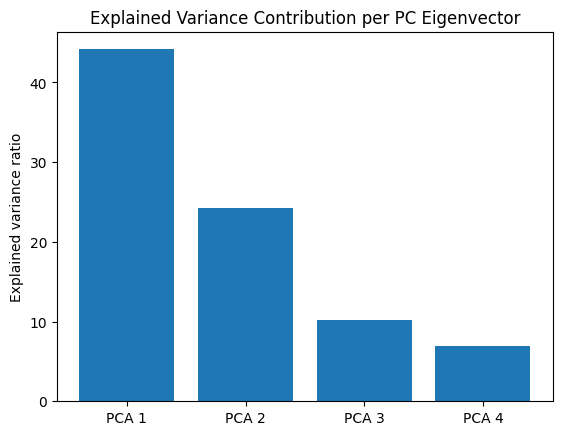

In [48]:
plt.bar(["PCA 1", "PCA 2", "PCA 3", "PCA 4"], (pca.explained_variance_ratio_)*100)
plt.ylabel("Explained variance ratio")
plt.title("Explained Variance Contribution per PC Eigenvector")

pca.explained_variance_ratio_

Above we plot the corresponding explained variance ratio per eigenvector. The vector with the highest explained variance essentially captures the most information about the original data. For example, below is a plot of the normalized spectral flux against another. To capture most of the original data while reducing dimensions, we can for example choose to project the data along a diagonal from the lower left of the plot to the upper right. Doing so we may capture most of the variance or spread of the data while losing minimal information about data perpendicular to the main direction of the spread. Adding more eigenvectors to project the original data onto increases the complexity/dimensions of the data, but allows one to capture more information about the dataset.

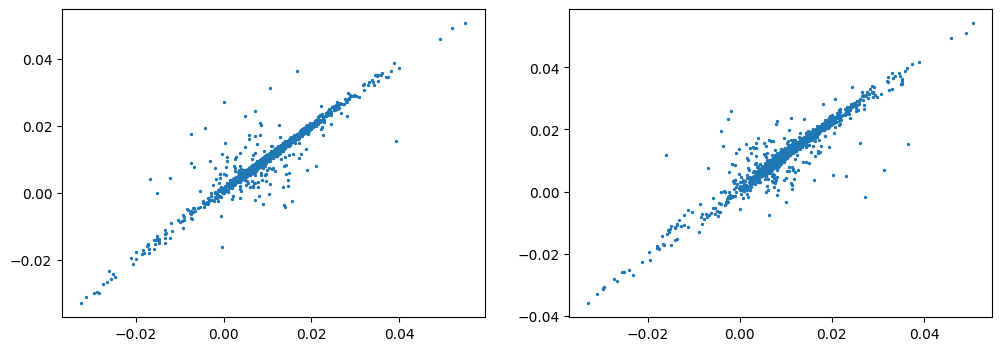

In [49]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

for i in range(0, 2):
  ax[i].scatter(spec_recons[:, i], spec_recons[:, i + 1], s=2)

2. Plot the first two principal components (coefficient 1 in the x axis and coefficient 2 in the y axis). Make sure to label the axes and good to set x and y axis limits to be equal. *(25 pts.)*

Text(0.5, 1.0, 'Principal Component Plot')

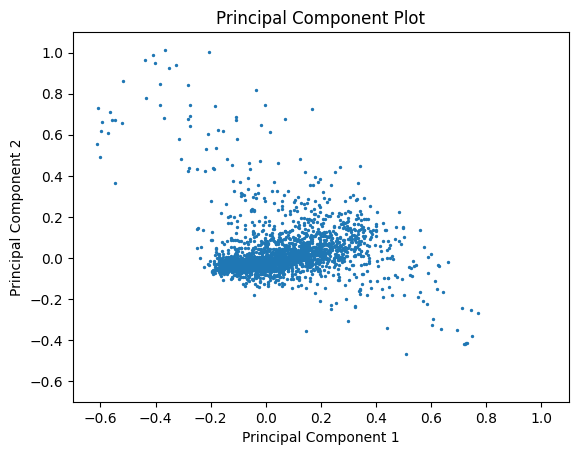

In [50]:
plt.scatter(spec_recons_projected[:, 0], spec_recons_projected[:, 1], s=2)

plt.xlim(-0.7, 1.1)
plt.ylim(-0.7, 1.1)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Principal Component Plot")

3. Plot the first 4 eigenvectors together with the mean spectrum. Add an arbitrary y-offset between the spectra for clarity. *(25 pts.)*

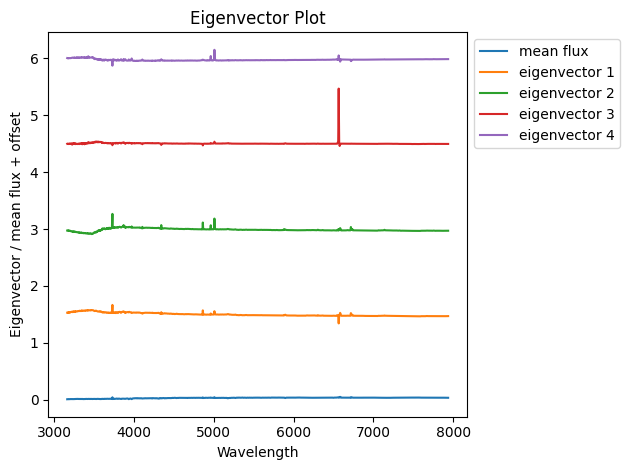

In [51]:
offset = 1.5
plt.plot(wavelength, mean, label="mean flux")
for i in range(4):
  plt.plot(wavelength, pca.components_[i] + (i + 1) * offset, label=f"eigenvector {i + 1}")

plt.xlabel("Wavelength")
plt.ylabel("Eigenvector / mean flux + offset")
plt.title("Eigenvector Plot")
plt.legend(bbox_to_anchor=(1.0, 1.0), loc="upper left")
plt.tight_layout()

From the plot above we observe how the mean spectrum has the most stable or "flat" line when compared to the eigenvector plots. This is because the mean spectrum has a mostly constant flux with increasing wavelength, as we have already seen and explained earlier. The first and second eigenvectors are also mostly flat, meaning they capture information about the original data which are probably along the mean spectral flux, as that "direction" will capture the highest variance (recall how PCA 1 and PCA 2 contain the largest explained variance). We can also note the spike of eigenvector 3 at around $6600$ Angstroms of wavelength. We've already noted this wavelength value earlier that which is a cause for a high standard deviation. Accordingly, this eigenvector must be capturing information about the earlier spikes of flux in this range of wavelength.  